<a href="https://colab.research.google.com/github/Ravikumar10593-hub/15daybootcamp/blob/main/Day5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Car price prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported")

Imported


In [9]:
data=pd.read_csv('/content/Car.csv')

In [10]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [11]:
data.shape

(804, 12)

In [12]:
data.isnull().sum()
#we have no  null value

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


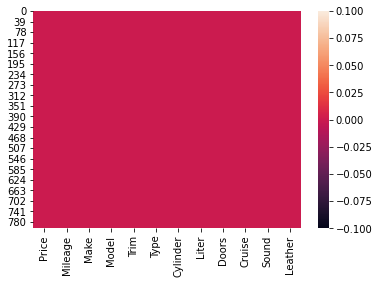

In [16]:
#heatmap
sns.heatmap(data.isnull())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


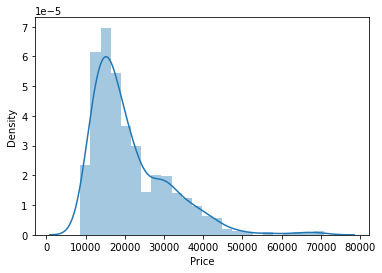

In [17]:
#dist plot for price
sns.distplot(data.Price)

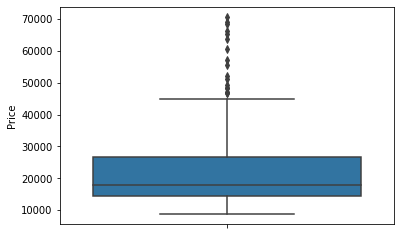

In [18]:
#boox plot for price
sns.boxplot(y=data.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


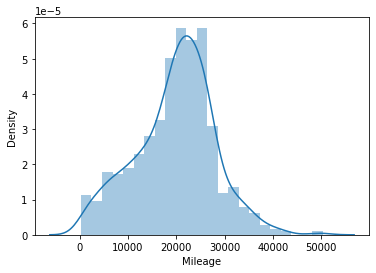

In [19]:
#dist plot for mileage
sns.distplot(data.Mileage)

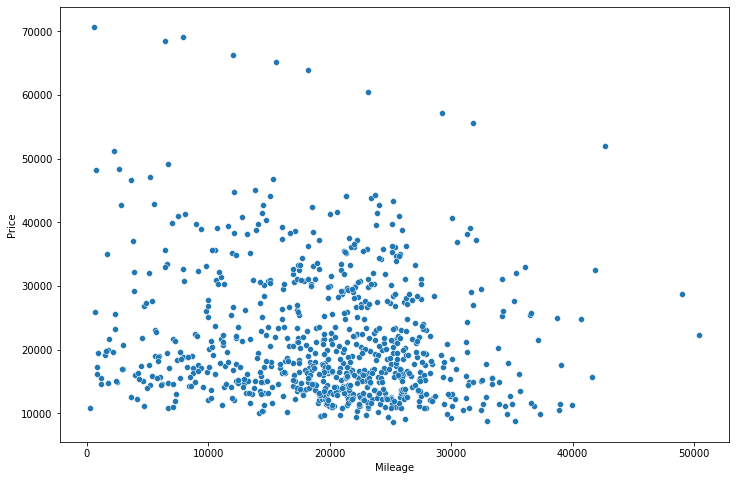

In [23]:
#plot scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x=data.Mileage,y=data.Price)

In [24]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


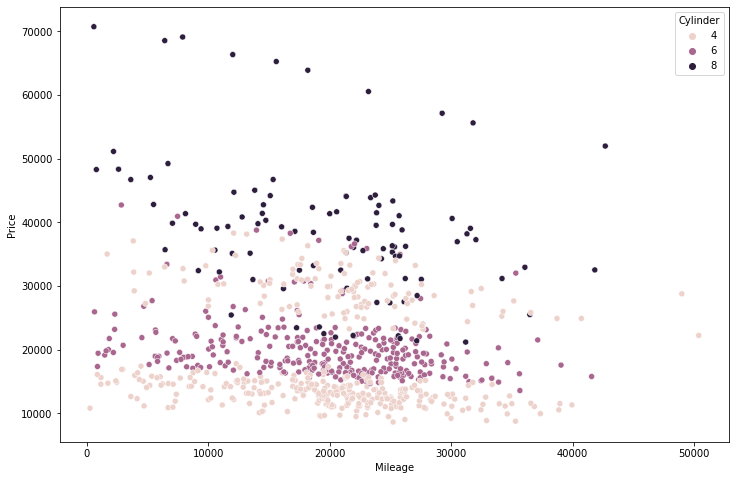

In [25]:
#plot scatter plot with respect to cylinder
plt.figure(figsize=(12,8))
sns.scatterplot(x=data.Mileage,y=data.Price,hue=data.Cylinder)

In [32]:
#count of manufacting of each comany
data['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


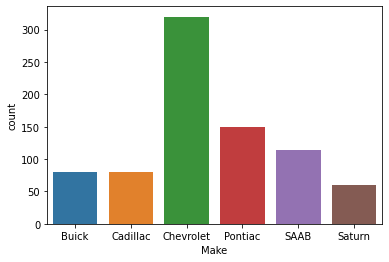

In [33]:
#count plot
sns.countplot(data.Make)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

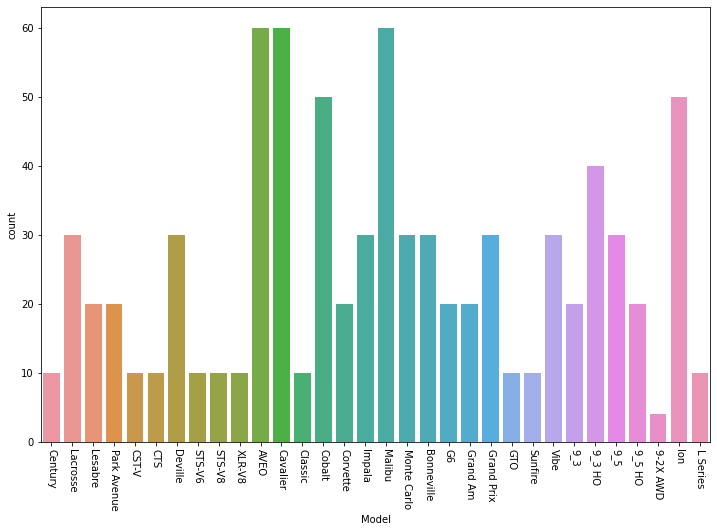

In [39]:
#roation in x axis
plt.figure(figsize=(12,8))
sns.countplot(data.Model)
plt.xticks(rotation =270)

In [40]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [41]:
#transformation
#minmaxScaler operation
from sklearn.preprocessing import MinMaxScaler
cat_col=['Make','Model','Trim','Type']
df_2=pd.get_dummies(data[cat_col],drop_first=True)


In [42]:
#Minmax scalar implemention for normalization
scale=MinMaxScaler()
data['Mileage']=scale.fit_transform(data[['Mileage']])

In [43]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,0.158716,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,0.176952,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,0.257976,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,0.320744,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,0.390375,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [44]:
data.drop(cat_col,axis=1,inplace=True)

In [45]:
data.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,0.158716,6,3.1,4,1,1,1
1,17542.03608,0.176952,6,3.1,4,1,1,0
2,16218.84786,0.257976,6,3.1,4,1,1,0
3,16336.91314,0.320744,6,3.1,4,1,0,0
4,16339.17032,0.390375,6,3.1,4,1,0,1


In [48]:
data_new=pd.concat([data,df_2],axis=1)

In [49]:
data_new.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Model_AVEO,Model_Bonneville,Model_CST-V,Model_CTS,Model_Cavalier,Model_Century,Model_Classic,Model_Cobalt,Model_Corvette,Model_Deville,Model_G6,Model_GTO,Model_Grand Am,Model_Grand Prix,Model_Impala,Model_Ion,Model_L Series,Model_Lacrosse,Model_Lesabre,Model_Malibu,Model_Monte Carlo,Model_Park Avenue,Model_STS-V6,...,Trim_Coupe 2D,Trim_Custom Sedan 4D,Trim_DHS Sedan 4D,Trim_DTS Sedan 4D,Trim_GT Coupe 2D,Trim_GT Sedan 4D,Trim_GT Sportwagon,Trim_GTP Sedan 4D,Trim_GXP Sedan 4D,Trim_Hardtop Conv 2D,Trim_L300 Sedan 4D,Trim_LS Coupe 2D,Trim_LS Hatchback 4D,Trim_LS MAXX Hback 4D,Trim_LS Sedan 4D,Trim_LS Sport Coupe 2D,Trim_LS Sport Sedan 4D,Trim_LT Coupe 2D,Trim_LT Hatchback 4D,Trim_LT MAXX Hback 4D,Trim_LT Sedan 4D,Trim_Limited Sedan 4D,Trim_Linear Conv 2D,Trim_Linear Sedan 4D,Trim_Linear Wagon 4D,Trim_MAXX Hback 4D,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.10313,0.158716,6,3.1,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,17542.03608,0.176952,6,3.1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16218.84786,0.257976,6,3.1,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,16336.91314,0.320744,6,3.1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,16339.17032,0.390375,6,3.1,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [51]:
x=data_new[['Mileage']]
y=data_new[['Price']]

In [54]:
#split test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25) 

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lr.predict(x_test)

array([[21542.36561758],
       [20355.86651606],
       [21236.58351539],
       [19447.39515178],
       [22306.57882916],
       [20492.70198975],
       [22221.86347103],
       [19959.72136521],
       [22213.6339791 ],
       [22788.24615107],
       [21122.17744127],
       [22163.93430234],
       [21111.36614795],
       [20419.92746306],
       [21663.38755775],
       [20537.07670115],
       [21379.3894048 ],
       [21060.2142079 ],
       [18673.98427274],
       [22227.1884364 ],
       [20843.02016593],
       [19193.73316517],
       [21264.49924292],
       [22621.71996139],
       [21340.17829618],
       [20780.41148221],
       [21579.15628739],
       [20690.5325213 ],
       [22164.09566492],
       [18980.73455045],
       [21376.80760341],
       [21424.40956655],
       [20760.56388402],
       [18825.98782961],
       [21053.11425408],
       [18326.89334831],
       [19580.51928598],
       [20363.28919506],
       [22008.21940597],
       [20323.2712735 ],


In [59]:
predict=lr.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predict)

99158772.32270375

In [70]:
lr.score(x_test, y_test) #we cant do accurary becz acc is for classifiaction problem

0.02726300647732749